## 本章：单词的含义

### 1. 基于同义词词典的方法

在同义词词典中，具有相同含义的单词（同义词）或语义类似的单词（近义词）被归类到同一个组中

在NLP中，最著名的同义词词典就是**WordNet**

##### dem01:

In [1]:
from nltk.corpus import wordnet

In [3]:
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [4]:
car = wordnet.synset('car.n.01') # 同义词簇
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [5]:
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [7]:
car.hypernym_paths()[0]

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

In [8]:
# 计算单词之间的相似度
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01')

In [9]:
car.path_similarity(novel)

0.05555555555555555

In [10]:
car.path_similarity(dog)

0.07692307692307693

In [11]:
car.path_similarity(motorcycle)

0.3333333333333333

## 2. 基于计数的方法

（1）语料库：大量的文本数据
（2）基于计数的方法的目标：从富有实践知识的语料库中，自动且高效地提取本质

#### demo01:

In [13]:
text = 'You say goodbye and I say Hello.' # 单个文本作为语料库
text = text.lower()
text = text.replace('.',' .')
text

'you say goodbye and i say hello .'

In [14]:
words = text.split(' ')
words # 将原始文章作为单词列表使用

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [15]:
word_to_id = {}
id_to_word = {}
for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [16]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [17]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [18]:
id_to_word[1]

'say'

In [19]:
word_to_id['and']

3

In [4]:
import numpy as np

In [5]:
corpus = [word_to_id[w] for w in words]
corpus

NameError: name 'words' is not defined

In [24]:
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [6]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word

In [7]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [8]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [9]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [10]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

能准确把握单词含义的向量表示，称为**分布式表示**
> 单词的分布式表示将单词表示为固定长度的**向量**，这种向量的特征在于它使用密集向量表示的。

基于计数的方法：<br>
> 在关注某个单词的情况下，对它的周围出现了多少次什么单词进行计数，然后再汇总

In [30]:
print(corpus)

[0 1 2 3 4 1 5 6]


In [31]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


用表格记录单词上下文的频数<br>
下图表格的各行对应相应单词的向量，称为**共现矩阵**
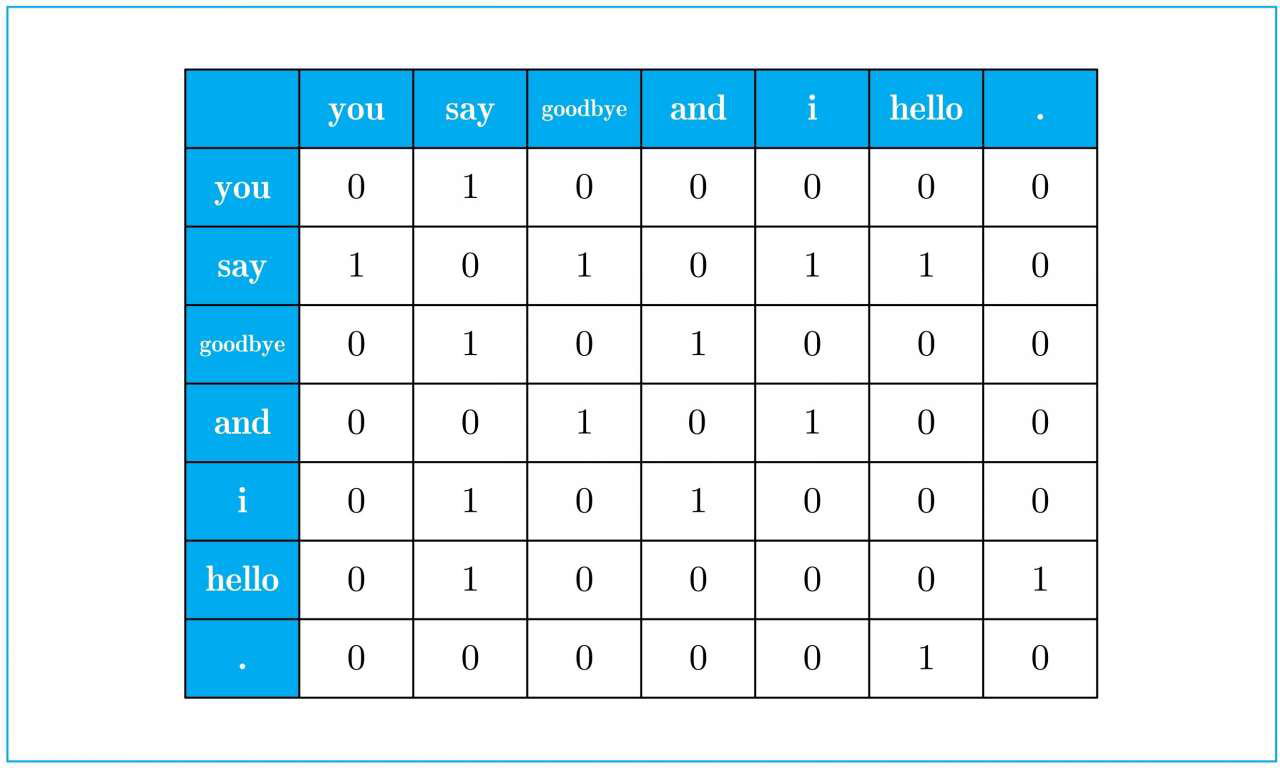

In [11]:
import numpy as np
# 上图共现矩阵
C = np.array([
    [0,1,0,0,0,0],
    [1,0,1,0,1,1],
    [0,1,0,1,0,0],
    [0,0,1,0,1,0],
    [0,1,0,1,0,1],
    [0,1,0,0,0,0]
], dtype=np.int32)

In [12]:
print(C[0]) # 单词ID为0的向量

[0 1 0 0 0 0]


In [13]:
# 直接从语料库生成共现矩阵
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx-i
            right_idx = idx+i
            if left_idx>=0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id]+=1
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id]+=1
    return co_matrix

In [14]:
co_matrix = create_co_matrix(corpus,7)

In [15]:
co_matrix

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

#### 向量间的相似度

常用：余弦相似度（表示两个向量在多大成都上指向了同一个方向）

In [16]:
def cos_similarity(x, y, eps=1e-8): # eps微小量，避免除数为0的error
    nx = x/(np.sqrt(np.sum(x**2))+eps) # x的正规化
    ny = y/(np.sqrt(np.sum(y**2))+eps)
    return np.dot(nx, ny)

In [17]:
# 计算you和i之间的相似度
text = 'You say goodbye and I say hello'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

In [18]:
c0 = C[word_to_id['you']] # you的单词向量
c1 = C[word_to_id['i']]
print(cos_similarity(c0,c1))

0.7071067691154799


#### 相似单词的排序

In [21]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1.取出查询词
    if query not in word_to_id:
        print('%s is not found'%query)
        return
    print('\n[query]'+query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    # 2.计算余弦相似度
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(query_vec, word_matrix[i])
    # 3.基于余弦相似度，按降序输出值
    count = 0
    for i in (-1*similarity).argsort(): # 此处输出按相似度降序排序的索引
        if (id_to_word[i] == query):
            continue
        print(' %s: %s'%(id_to_word[i], similarity[i]))
        count+=1
        if count >= top:
            return
        

In [22]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C)


[query]you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


正的点互信息

In [27]:
def ppmi(C, verbose=False, eps=1e-8): # verbose:是否输出运行情况的标志
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C,axis=0)
    total = C.shape[0]*C.shape[1]
    cnt = 0
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i,j]*N/(S[i]*S[j])+eps)
            M[i,j] = max(0, pmi)
            if verbose:
                cnt += 1
                if cnt % (total//100+1)==0:
                    print("%.1f%% done"%(100*cnt/total))
    return M

In [34]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

In [35]:
np.set_printoptions(precision=3)#有效位数为3
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


PPMI矩阵比共现矩阵更能很好的表征单词的词向量，但是PPMI存在对着corpus词汇量增加，维度爆炸且大量占位0的问题

### 重要：降维

- 降低向量的维度，在尽量保留重要信息的基础上，如下图，二维降为一维
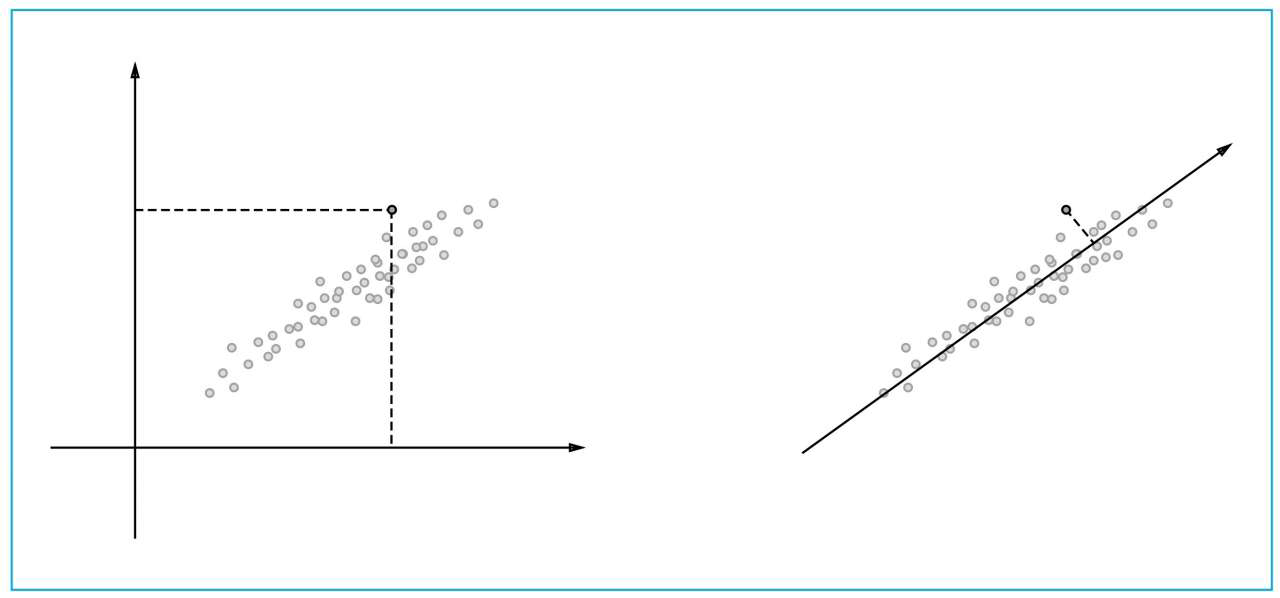

- 降维的常用方法：**奇异值分解**（SVD）
- $$ X=USV^T $$

In [36]:
U, S, V = np.linalg.svd(W)

In [37]:
print(C[0])# 共现矩阵

[0 1 0 0 0 0 0]


In [38]:
print(W[0]) # PPMI矩阵

[0.    1.807 0.    0.    0.    0.    0.   ]


In [40]:
print(U[0]) # SVD

[-1.110e-16  3.409e-01 -1.205e-01 -4.163e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


In [42]:
# 对U[0]这个密集向量进行降维, 如降成2维，取前两个元素即可
print(U[0,:2])

[-1.110e-16  3.409e-01]


#### demo2: 用二维向量表示各个单词，并把它们画在图上

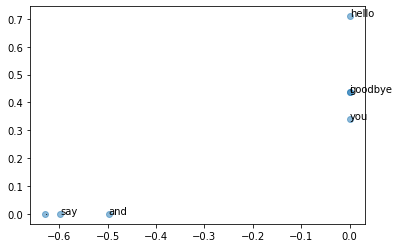

In [46]:
import matplotlib.pyplot as plt
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

使用更大的语料库进行上述实验，PTB数据集<br>